## Playing with sampling and the Central Limit Theorem

Begin with imports:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's create a population that isn't normally distributed we will concatenate several normal distributions to do so:

In [6]:
d1 = np.random.normal(loc=-6.4, scale=1.2, size=40000)
d2 = np.random.normal(loc=4, scale=10, size=16000)
d3 = np.random.normal(loc=22, scale=8, size=72000)
population = np.concatenate([d1, d2, d3])
pop = pd.DataFrame(data=population, columns=['population'])
pop.head()

,population
0,-5.503381
1,-5.235009
2,-6.749082
3,-7.051252
4,-6.407138


## Make a histogram. Play around with bin size

Hint: there are multiple ways to do this. Try numpy.histogram or the pandas method hist.

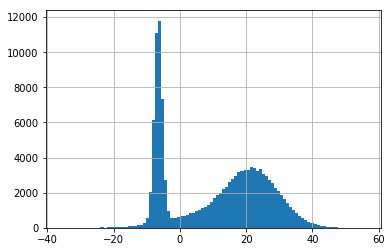

In [7]:
pop['population'].hist(bins=100)

Extra: Try displaying the data using an alternate visualization technique, a violin plot. Seaborn has a built-in method that is useful for this.

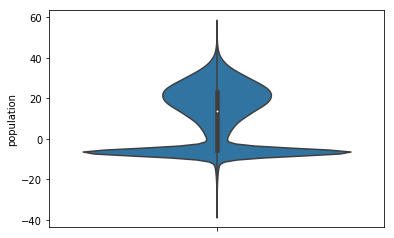

In [8]:
import seaborn as sns
ax = sns.violinplot(y='population', data=pop)

## Make a kernel density estimate of the population distribution

Hint: pandas.DataFrame.plot.kde

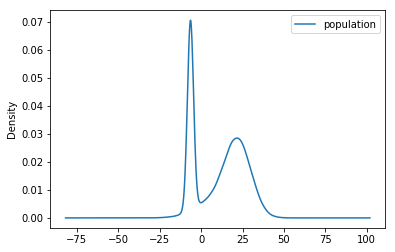

In [9]:
pop.plot.kde()

## Compute the mean of the population

In [10]:
pop['population'].mean()

10.86371514357984

## Computer the standard deviation of the population

In [11]:
pop['population'].std()

14.75039486918878

## We have described our population. Now let's draw a sample of size n and look at the distrubtion of our sample mean and s.d.

Write a function that samples the pop dataframe with an argument n that is the number of samples to take. Sample without replacement.

In [12]:
def draw_sample(pop, n):
    data = np.random.choice(pop, size=n, replace=False)
    sample = pd.DataFrame(data=data, columns=['population_sample'])
    return sample

In [14]:
sample = draw_sample(pop['population'], 20)

In [15]:
sample

,population_sample
0,36.849732
1,24.754492
2,16.233591
3,13.715020
4,38.359176
5,14.034288
6,-7.328598
7,-5.156395
8,6.100380
9,-7.358471


## Now we want to draw repeated samples of size *n* from the population

Create another function that calls the first `samples` times. Have `samples` be an argument to the function along with n which is the argument to the first function. For each sample, append the mean and the standard deviation of the sample to two separate lists and return them.

Hint: use a loop with    range(samples) iterations. To create an empty list at the start of a function, try something like:

    def repeat_samples(samples, n):  
      means = []  
      sds = []  
      ...  
      return (means, sds)
    
then use the append method to append each mean and sd value to the end of each respective list.

In [18]:
def repeat_samples(pop, samples, n):
    means = []
    sds = []
    
    for i in range(samples):
        sample = draw_sample(pop['population'], n)
        means.append(sample['population_sample'].mean())
        sds.append(sample['population_sample'].std())
    
    return (means, sds)

In [19]:
means, sds = repeat_samples(pop, 30, 30)

In [23]:
means, sds

([11.512396918015623,
  9.578662513430675,
  14.588020888152126,
  10.08304280820898,
  9.6989564743881,
  12.090727006511251,
  6.583909875007616,
  10.34021334298936,
  13.396721979024882,
  18.64609281712803,
  11.292622671308267,
  5.284716122066442,
  6.8442105372355835,
  11.609518403792144,
  14.38705376940605,
  12.248061344276033,
  9.713042358012867,
  11.49702480152265,
  12.96465143365734,
  8.174098383469047,
  10.550519856592135,
  12.503688390826488,
  9.896489180681483,
  15.25214860795932,
  8.226588435390669,
  9.58710062688068,
  6.255966538925582,
  13.2668686410122,
  12.445259172333824,
  14.30908586025674],
 [16.0805446822922,
  16.868736059878902,
  15.541541766551113,
  13.855907655827458,
  13.498683273654253,
  13.773379691861065,
  15.38799703921035,
  13.922106075655671,
  14.320634864242498,
  15.837127856408875,
  14.11955224205894,
  14.708373853717177,
  12.837422556149502,
  15.733803979351489,
  16.781333836655037,
  16.136577500186796,
  13.131766453

## Almost there!

Now make a function with two arguments `samples` and `n` that takes the return values from the last function and
* converts the lists to a single dataframe
* plots two histograms of the columns (mean, sd)
* prints out the mean and sd of the columns

Hint: to get a multi-valued return into new variables, try this:

    means, sds = repeat_samples(samples, n)
    df = pd.DataFrame(data={'means: means, 'sds': sds})

In [24]:
def describe_sample(pop, samples, n):
    means, sds = repeat_samples(pop, samples, n)
    df = pd.DataFrame(data={'means': means, 'sds': sds})
    
    df.hist(bins=100)
    print('Mean: {}'.format(np.round(df['means'].mean(), 2)))
    print('Std Dev: {}'.format(np.round(df['sds'].mean(), 2)))
    
    return df

Mean: 10.94
Std Dev: 14.72


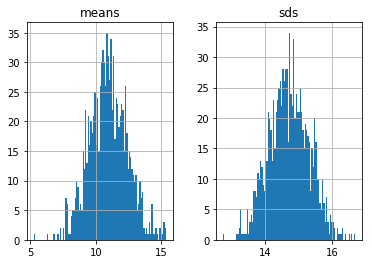

In [25]:
df = describe_sample(pop, 1000, 100)

Mean: 10.85
Std Dev: 14.74


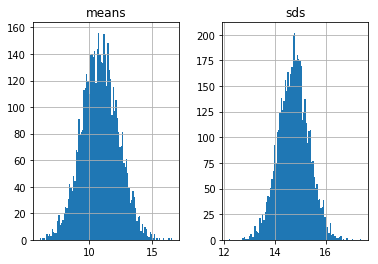

In [26]:
df = describe_sample(pop, 5000, 100)

## Run your final function several times with varying values of samples and n

How did your result begin to converge on the population mean and sd?

## Bootstrapping your data: Finding confidence intervals

Statisticians take advantage of the central limit theorem as a method of establishing confidence intervals. Create a function that finds the nth and (100-n)th percentiles of the distribution of means found with describe_sample.

In [27]:
def bootstrapping(pop, sample, n, percentile):
    df = describe_sample(pop, sample, n)
    li = df['means'].quantile(q=percentile)
    ui = df['means'].quantile(q=1-percentile)
    mean = df['means'].mean()
    
    print('Mean: {}: and CI: {} - {}'.format(np.round(mean, 2),
                                             np.round(li, 2), np.round(ui, 2)))
    
    return df, mean, ui, li

Mean: 10.89
Std Dev: 14.75
Mean: 10.89: and CI: 8.5 - 13.23


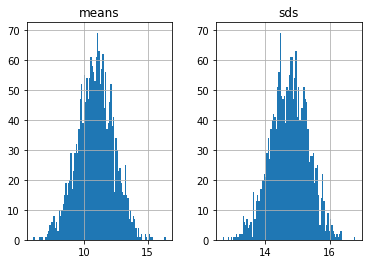

In [28]:
df, mean, ui, li = bootstrapping(pop, 2000, 100, 0.05)

In [3]:
will this get saved?

Object `saved` not found.


In [ ]:
will this get saved

In [ ]:
will this get saved